# Analyzing dataset using goupby, linear regression models and using sqlite3 module


In [50]:
import pandas as pd
import numpy as np

In [51]:
bwght_df = pd.read_csv('BWGHT.csv')

In [52]:
for pair in enumerate (bwght_df.columns): print(pair)

(0, 'faminc')
(1, 'cigtax')
(2, 'cigprice')
(3, 'bwght')
(4, 'fatheduc')
(5, 'motheduc')
(6, 'parity')
(7, 'male')
(8, 'white')
(9, 'cigs')
(10, 'lbwght')
(11, 'bwghtlbs')
(12, 'packs')
(13, 'lfaminc')


In [73]:
bwght_df.cigs

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       6
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1358     0
1359     3
1360     0
1361    10
1362     0
1363     0
1364     0
1365     0
1366     0
1367    15
1368     0
1369     0
1370     0
1371     0
1372     0
1373     0
1374     0
1375    20
1376     0
1377     0
1378     0
1379     0
1380     0
1381     0
1382     0
1383     0
1384     0
1385     0
1386     0
1387     0
Name: cigs, Length: 1388, dtype: int64

In [74]:
bwght_df.mean()

faminc       29.026657
cigtax       19.552954
cigprice    130.559006
bwght       118.699568
fatheduc     13.186242
motheduc     12.935833
parity        1.632565
male          0.520893
white         0.784582
cigs          2.087176
lbwght        4.760031
bwghtlbs      7.418723
packs         0.104359
lfaminc       3.071271
dtype: float64

In [78]:
df = (bwght_df.mean(),bwght_df.std())
df = pd.concat(df,1)
df.columns = ['mean', 'std dev']
df

,mean,std dev
faminc,29.026657,18.739285
cigtax,19.552954,7.795598
cigprice,130.559006,10.244484
bwght,118.699568,20.353964
fatheduc,13.186242,2.745985
motheduc,12.935833,2.376728
parity,1.632565,0.894027
male,0.520893,0.499743
white,0.784582,0.411260
cigs,2.087176,5.972688


In [79]:
bwght_df.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244484,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918064
min,0.500000,2.000000,103.800000,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800000,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800000,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


In [81]:
bwght_df.isnull().sum()

faminc        0
cigtax        0
cigprice      0
bwght         0
fatheduc    196
motheduc      1
parity        0
male          0
white         0
cigs          0
lbwght        0
bwghtlbs      0
packs         0
lfaminc       0
dtype: int64

In [53]:
bwght = bwght_df.values
y = bwght[:,3]

In [54]:
(n,r) = bwght.shape

In [55]:
x = np.ones((n,1))

In [56]:
x = (x,bwght[:,7:10])

In [57]:
x = np.hstack(x)

In [58]:
x = np.hstack((np.ones((n,1)),bwght[:,7:10]))

In [59]:
xx = np.dot(x.T,x)

In [60]:
xy = np.dot(x.T,y)

In [61]:
xxi = np.linalg.inv(xx)

In [62]:
b = np.dot(xxi,xy)
b

array([113.27770286,   3.05184325,   6.22970206,  -0.50572309])

In [68]:
e = y - np.dot(x,b)
vb = e.var()*xxi
se = np.sqrt(np.diagonal(vb))
tstat = np.divide(b,se)




In [69]:
from scipy.stats import norm
pval = 2*norm.cdf(-np.abs(tstat))

In [70]:
print(b)
print(se)
print(tstat)
print(pval)

[113.27770286   3.05184325   6.22970206  -0.50572309]
[1.30463496 1.06928496 1.29956484 0.08946234]
[86.827125    2.85409725  4.79368315 -5.65291601]
[0.00000000e+00 4.31593179e-03 1.63746828e-06 1.57748398e-08]


In [82]:
bwght1 = bwght_df.drop(['cigtax','cigprice','lbwght','bwghtlbs','packs','lfaminc'],1)

In [83]:
cpbwght = bwght1.copy()

In [85]:
# Calculating mean of variable with repect to no of cigrettres consumed
cpbwght.groupby(['cigs']).mean()

,faminc,bwght,fatheduc,motheduc,parity,male,white
cigs,,,,,,,
0,30.488520,120.061224,13.388943,13.170213,1.616497,0.529762,0.785714
1,35.833333,122.666667,13.333333,12.333333,1.333333,0.666667,1.000000
2,19.875000,109.500000,11.500000,11.000000,1.250000,0.500000,0.750000
3,15.357143,115.571429,11.200000,11.714286,1.571429,0.142857,0.714286
4,18.388889,109.888889,13.250000,11.666667,1.666667,0.444444,0.555556
5,24.842105,114.000000,12.705882,12.368421,1.736842,0.473684,0.789474
6,30.000000,123.166667,10.000000,12.333333,1.333333,0.166667,0.666667
7,26.250000,120.000000,13.333333,12.750000,1.750000,0.000000,0.750000
8,14.500000,91.000000,11.750000,11.800000,2.400000,0.400000,0.800000


In [92]:
bwght1['smokes'] = (bwght1['cigs']>0).astype(int)
cpbwght = bwght1.copy()
cpbwght.groupby(['smokes']).mean()

,faminc,bwght,fatheduc,motheduc,parity,male,white,cigs
smokes,,,,,,,,
0,30.488520,120.061224,13.388943,13.170213,1.616497,0.529762,0.785714,0.000000
1,20.917453,111.146226,11.888199,11.636792,1.721698,0.471698,0.778302,13.665094


In [93]:
# Subset to only smokers 

bwght1[bwght1['smokes']==1]

,faminc,bwght,fatheduc,motheduc,parity,male,white,cigs,smokes
22,15.5,129,8.0,11.0,2,1,1,6,1
63,0.5,104,NaN,12.0,2,0,0,10,1
68,7.5,119,12.0,10.0,2,1,0,20,1
74,18.5,115,3.0,12.0,1,0,0,40,1
92,7.5,93,14.0,12.0,1,1,0,10,1
94,13.5,109,8.0,8.0,2,0,1,10,1
97,22.5,121,11.0,12.0,1,1,1,20,1
102,11.5,139,12.0,12.0,2,0,1,3,1
107,27.5,106,12.0,13.0,1,1,0,10,1
115,37.5,97,11.0,11.0,2,0,1,20,1


In [94]:
bwght1['parity'].unique()

array([1, 2, 6, 3, 5, 4], dtype=int64)

In [95]:
cpbwght.groupby(['parity']).mean()

,faminc,bwght,fatheduc,motheduc,male,white,cigs,smokes
parity,,,,,,,,
1,29.691824,117.606289,13.228654,13.078086,0.529560,0.811321,1.705660,0.134591
2,29.482005,119.915167,13.276276,13.005141,0.508997,0.766067,2.542416,0.177378
3,26.623288,120.938356,12.814516,12.335616,0.520548,0.705479,2.438356,0.171233
4,24.692308,119.358974,13.500000,12.461538,0.410256,0.769231,3.743590,0.256410
5,17.033333,121.800000,11.000000,10.733333,0.600000,0.666667,3.333333,0.066667
6,27.500000,118.000000,13.000000,12.750000,0.750000,0.750000,0.000000,0.000000


In [98]:
for case in bwght1['parity'].unique():
    print(case,cpbwght[cpbwght['parity']==case].mean())

1 faminc       29.691824
bwght       117.606289
fatheduc     13.228654
motheduc     13.078086
parity        1.000000
male          0.529560
white         0.811321
cigs          1.705660
smokes        0.134591
dtype: float64
2 faminc       29.482005
bwght       119.915167
fatheduc     13.276276
motheduc     13.005141
parity        2.000000
male          0.508997
white         0.766067
cigs          2.542416
smokes        0.177378
dtype: float64
6 faminc       27.50
bwght       118.00
fatheduc     13.00
motheduc     12.75
parity        6.00
male          0.75
white         0.75
cigs          0.00
smokes        0.00
dtype: float64
3 faminc       26.623288
bwght       120.938356
fatheduc     12.814516
motheduc     12.335616
parity        3.000000
male          0.520548
white         0.705479
cigs          2.438356
smokes        0.171233
dtype: float64
5 faminc       17.033333
bwght       121.800000
fatheduc     11.000000
motheduc     10.733333
parity        5.000000
male          0.600000


In [100]:
#Binning by no of cigrattes
cpbwght['cigbins'] = pd.cut(bwght1['cigs'],[-1,0,10,20,30,40,50])
cpbwght.groupby(['cigbins']).mean()

,faminc,bwght,fatheduc,motheduc,parity,male,white,cigs,smokes
cigbins,,,,,,,,,
"(-1, 0]",30.488520,120.061224,13.388943,13.170213,1.616497,0.529762,0.785714,0.000000,0
"(0, 10]",21.575221,112.946903,11.820225,11.707965,1.637168,0.398230,0.761062,7.309735,1
"(10, 20]",20.790698,109.406977,12.250000,11.720930,1.790698,0.546512,0.825581,18.430233,1
"(20, 30]",15.500000,108.200000,9.666667,10.400000,1.600000,0.600000,0.800000,30.000000,1
"(30, 40]",17.166667,106.500000,9.800000,10.000000,1.833333,0.500000,0.666667,40.000000,1
"(40, 50]",14.000000,105.500000,NaN,12.000000,3.500000,1.000000,0.000000,48.000000,1


In [101]:
cpbwght.groupby(['white','cigbins']).mean()

faminc       bwght   fatheduc   motheduc    parity  \
white cigbins                                                           
0     (-1, 0]   19.103175  114.678571  12.676829  12.583333  1.722222   
      (0, 10]   12.833333  107.851852  11.571429  11.518519  1.925926   
      (10, 20]  13.833333  110.200000  11.500000  11.466667  1.933333   
      (20, 30]   3.500000  138.000000        NaN  10.000000  3.000000   
      (30, 40]  12.000000  102.000000   6.000000  10.000000  1.500000   
      (40, 50]  14.000000  105.500000        NaN  12.000000  3.500000   
1     (-1, 0]   33.593615  121.529221  13.523645  13.330444  1.587662   
      (0, 10]   24.319767  114.546512  11.866667  11.767442  1.546512   
      (10, 20]  22.260563  109.239437  12.327586  11.774648  1.760563   
      (20, 30]  18.500000  100.750000   9.666667  10.500000  1.250000   
      (30, 40]  19.750000  108.750000  12.333333  10.000000  2.000000   
      (40, 50]        NaN         NaN        NaN        NaN       NaN   

                    male       cigs  smokes  
white cigbins                                
0     (-1, 0]   0.551587   0.000000     0.0  
      (0, 10]   0.407407   7.074074     1.0  
      (10, 20]  0.533333  19.333333     1.0  
      (20, 30]  1.000000  30.000000     1.0  
      (30, 40]  0.500000  40.000000     1.0  
      (40, 50]  1.000000  48.000000     1.0  
1     (-1, 0]   0.523810   0.000000     0.0  
      (0, 10]   0.395349   7.383721     1.0  
      (10, 20]  0.549296  18.239437     1.0  
      (20, 30]  0.500000  30.000000     1.0  
      (30, 40]  0.500000  40.000000     1.0  
      (40, 50]       NaN        NaN     NaN

In [102]:




class lm0:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        (self.n,self.r) = x.shape
        xx = np.dot(x.T,x)
        xy = np.dot(x.T,y)
        self.xxi = np.linalg.inv(xx)
        self.b = np.linalg.solve(xx,xy)
        e = y - np.dot(x,self.b)
        self.resid = e
        self.vb = self.genvariance(e)
        self.se = np.sqrt(np.diagonal(self.vb))
        self.tstat = np.divide(self.b,self.se)
        self.pval = 2*norm.cdf(-np.abs(self.tstat))
        self.rsq = 1-e.var()/y.var()
        self.adjrsq = 1-(1-self.rsq)*(self.n-1)/(self.n-self.r)
        self.logl = -self.n/2*(np.log(2*np.pi*e.var())+1)
        self.aic = 2*self.r-2*self.logl
        self.bic = np.log(self.n)*self.r-2*self.logl
        nulllike = -self.n/2*(np.log(2*np.pi*y.var())+1)
        self.deviance = 2*(self.logl-nulllike)
    def genvariance(self,e):
        return e.var()*self.xxi
    def predict(self,*args):
        if len(args)>=2:
            raise Exception('Predict takes 0 or 1 argument')
        elif len(args)==0:
            newx = self.x
        else:
            newx = args[0]
        return np.dot(newx,self.b)
    def tidy(self):
        df = [self.b,self.se,self.tstat,self.pval]
        df = [x.reshape(-1,1) for x in df]
        df = np.hstack(df)
        df = pd.DataFrame(df,columns=['est','std.err','t.stat','p.val'])
        return df
    def glance(self):
        df = pd.DataFrame(columns=['r.squared','adj.rsq','r','logl',\
                                   'aic','bic','deviance','df'])
        df.loc[0] = [self.rsq,self.adjrsq,self.r,self.logl,self.aic,\
                     self.bic,self.deviance,self.n-self.r]
        return df
    def mspe(self,xtest,ytest):
        err = ytest - self.predict(xtest)
        return np.array(err.var())

class lm(lm0):
    def __init__(self,x,y):
        (self.n,self.r) = x.shape
        ones = np.ones((self.n,1))
        x = np.hstack((ones,x))
        super(lm,self).__init__(x,y)
    def predict(self,*args):
        if len(args)==1:
            newx = args[0]
            m = newx.shape[0]
            ones = np.ones((m,1))
            newx = np.hstack((ones,newx))
            return super(lm,self).predict(newx)
        return super(lm,self).predict(*args)

class white(lm):
    def genvariance(self,e):
        meat = np.diagflat(e**2)
        meat = self.x.T.dot(meat).dot(self.x)
        return self.xxi.dot(meat).dot(self.xxi)

In [104]:

type(bwght_df)



pandas.core.frame.DataFrame

In [105]:

y1 = bwght[:,3]
x1 = bwght[:,7:10]


In [107]:

modela = lm(x1,y1)
modela.tidy()

,est,std.err,t.stat,p.val
0,113.277703,1.304635,86.827125,0.000000e+00
1,3.051843,1.069285,2.854097,4.315932e-03
2,6.229702,1.299565,4.793683,1.637468e-06
3,-0.505723,0.089462,-5.652916,1.577484e-08


In [108]:
modelb = white(x1,y1)
modelb.tidy()

,est,std.err,t.stat,p.val
0,113.277703,1.359358,83.331784,0.000000e+00
1,3.051843,1.068340,2.856621,4.281765e-03
2,6.229702,1.361156,4.576774,4.722022e-06
3,-0.505723,0.088601,-5.707862,1.144039e-08


In [110]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

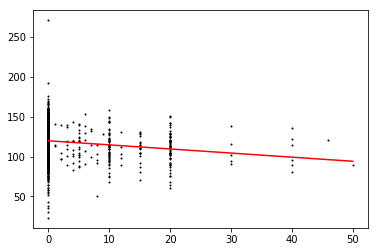

In [123]:
fig = plt.figure()
y = bwght_df['bwght'].values.reshape(-1,1)
x = bwght_df['cigs'].values.reshape(-1,1)
plt.scatter(x,y,s=1,c='black')
model = lm(x,y)
newx = np.linspace(0,50,100).reshape(-1,1)
newy = model.predict(newx)
plt.plot(newx,newy,c='red')
plt.show()

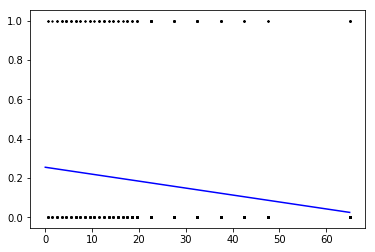

In [126]:
fig = plt.figure()
y = bwght_df['smokes'].values.reshape(-1,1)
x = bwght_df['faminc'].values.reshape(-1,1)
plt.scatter(x,y,s=1,c='black')
lmodel = lm(x,y)
newx = np.linspace(0,65,100).reshape(-1,1)
newy2 = lmodel.predict(newx)
plt.plot(newx,newy2,c='blue')
plt.show()

In [ ]:
import sqlite3

con = sqlite3.connect("bwght.db")
con.isolation_level = None
cur = con.cursor()

buffer = ""

print("Enter your SQL commands to execute in sqlite3.")
print("Enter a blank line to exit.")

while True:
    line = input()
    if line == "":
        break
    buffer += line
    if sqlite3.complete_statement(buffer):
        try:
            buffer = buffer.strip()
            cur.execute(buffer)

            if buffer.lstrip().upper().startswith("SELECT"):
                print(cur.fetchall())
        except sqlite3.Error as e:
            print("An error occurred:", e.args[0])
        buffer = ""

con.close()

Enter your SQL commands to execute in sqlite3.
Enter a blank line to exit.
select * from btable
